### Прогноз цен на авиабилеты

Авиакомпания — это компания, предоставляющая услуги воздушных перевозок пассажиров и грузов. Авиакомпании используют самолеты для предоставления этих услуг и могут заключать партнерские соглашения или альянсы с другими авиакомпаниями в рамках соглашений о код-шеринге, согласно которым они обе предлагают и выполняют один и тот же рейс. Как правило, авиакомпании признаются на основании сертификата или лицензии на осуществление воздушных перевозок, выданной государственным авиационным органом. Авиакомпании могут быть регулярными или чартерными операторами.

Авиакомпании устанавливают цены на свои услуги, стремясь максимизировать прибыль. Ценообразование авиабилетов с годами стало значительно сложнее и в настоящее время в значительной степени определяется компьютеризированными системами управления доходностью.

Цена авиабилета зависит от ряда факторов, таких как продолжительность полета, количество дней до вылета, время прибытия и отправления и т. д. Авиакомпании могут снижать стоимость в моменты, когда им необходимо нарастить спрос, и в моменты, когда билеты менее доступны. Они также могут максимизировать затраты. Цена может зависеть от различных факторов. Каждый фактор имеет свои собственные правила и алгоритмы для установления соответствующей цены. Последние достижения в области искусственного интеллекта (ИИ) и машинного обучения (МО) позволяют выводить такие правила и моделировать изменение цены.

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [142]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Загрузка данных

In [143]:
df = pd.read_csv("Clean_Dataset.csv", index_col=0)

In [144]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Описание набора данных

* **Airline** (Авиакомпания): Название авиакомпании хранится в столбце «Авиакомпания». Это категория, включающая 6 различных авиакомпаний.
* **Flight** (Рейс): Flight хранит информацию о коде рейса самолета. Это категориальный признак.
* **Source City** (Город-источник): Город, из которого вылетает самолет. Это категория, включающая 6 уникальных городов.
* **Departure Time** (Время отправления): это производная категориальная характеристика, полученная путем группировки временных периодов в интервалы. Она хранит информацию о времени отправления и имеет 6 уникальных временных меток.
* **Stops** (Остановки):Категориальный признак с тремя различными значениями, хранящий количество остановок между городами отправления и назначения.
* **Arrival Time** (Время прибытия): это производная категориальная характеристика, созданная путем группировки временных интервалов в интервалы. Она имеет шесть различных временных меток и содержит информацию о времени прибытия.
* **Destination City** (Город назначения): Город, где приземлится самолет. Это категория, включающая 6 уникальных городов.
* **Class** (Класс): Категориальный признак, содержащий информацию о классе места; имеет два различных значения: Бизнес и Эконом.
* **Duration** (Продолжительность): Непрерывный параметр, отображающий общее время, необходимое для поездки между городами в часах.
* **Days Left** (Осталось дней): это производная характеристика, которая рассчитывается путем вычитания даты поездки из даты бронирования.
* **Price** (Цена): Целевая переменная хранит информацию о цене билета.
не билета.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [146]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [147]:
df.describe(include='O')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


## Разведочный анализ данных (РАД, EDA)

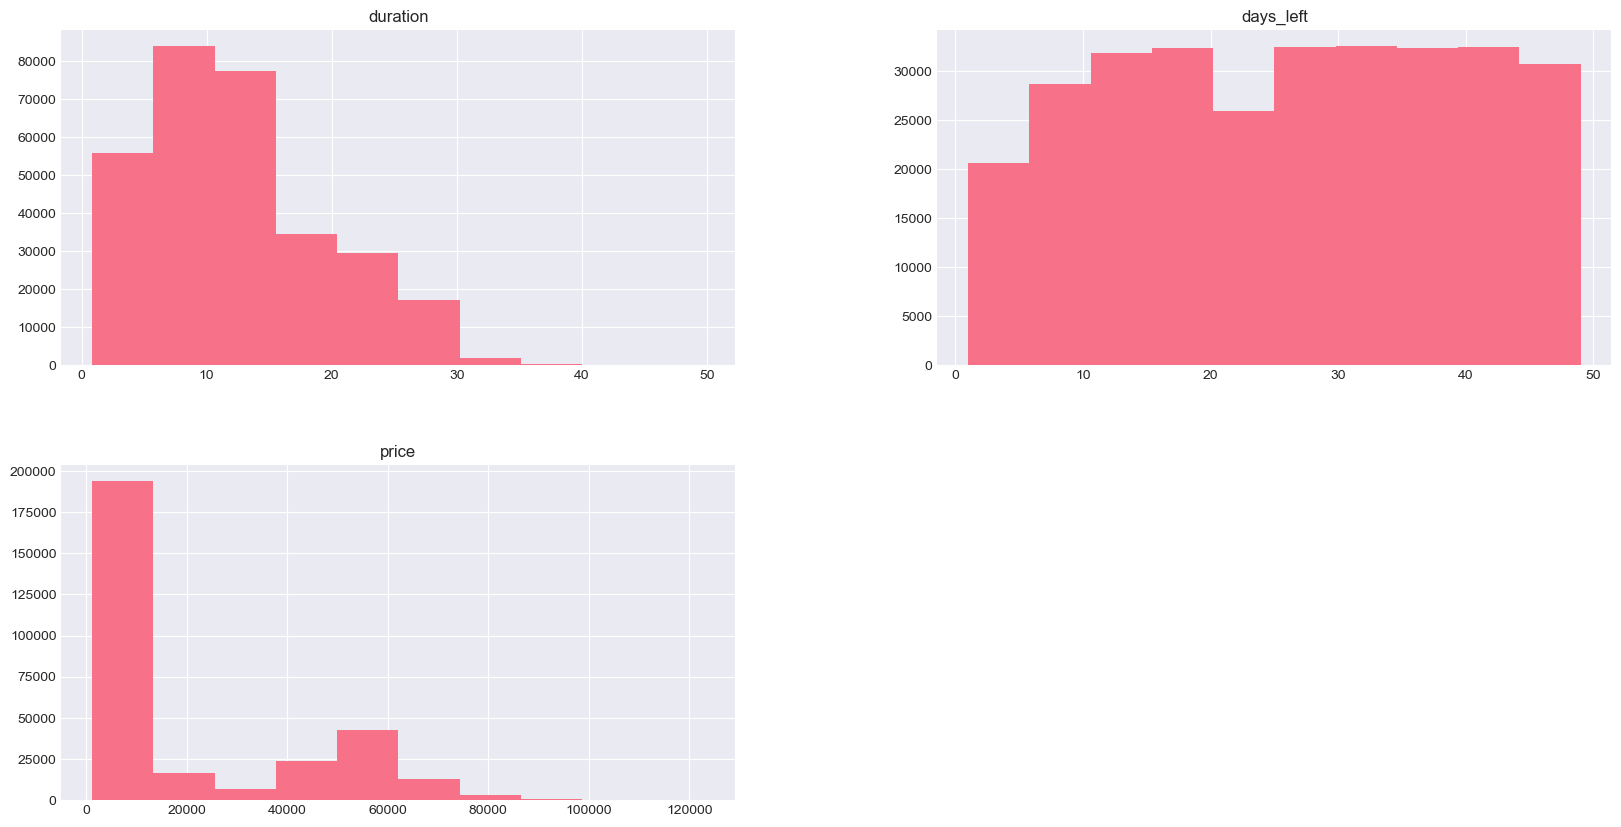

In [148]:
df.hist(figsize=(20,10));

In [149]:
cat_features = [column for column in df.columns if df[column].dtype =="object"]

In [150]:
cat_features

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

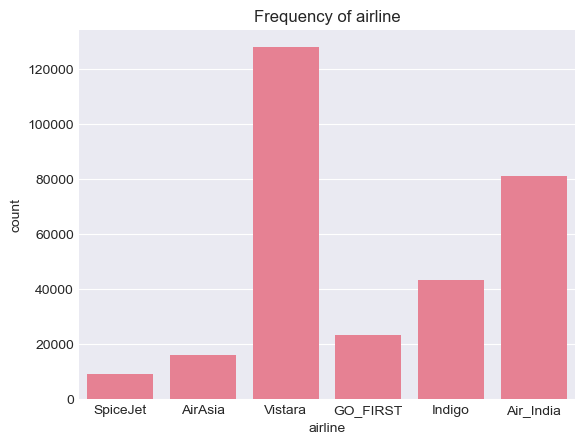

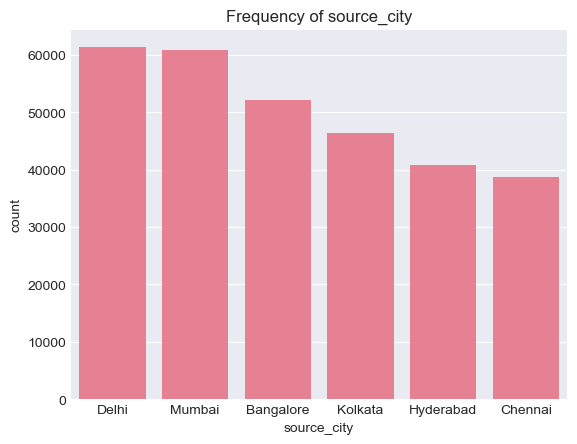

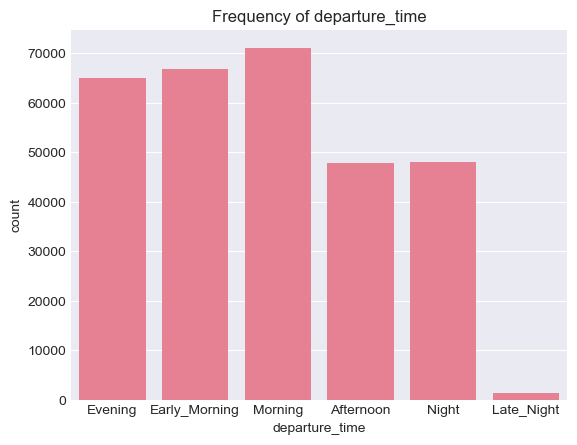

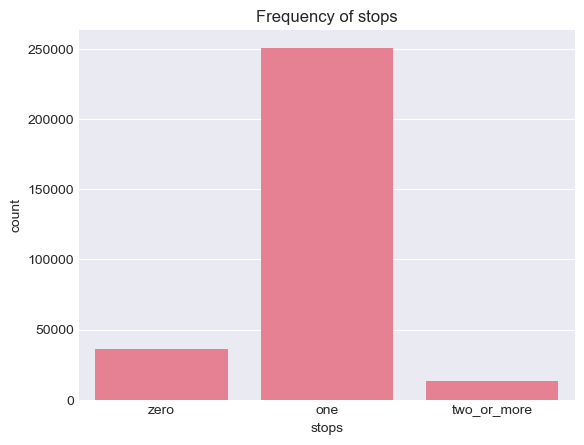

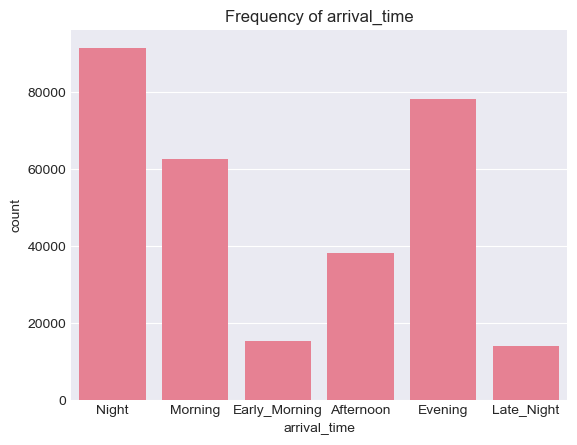

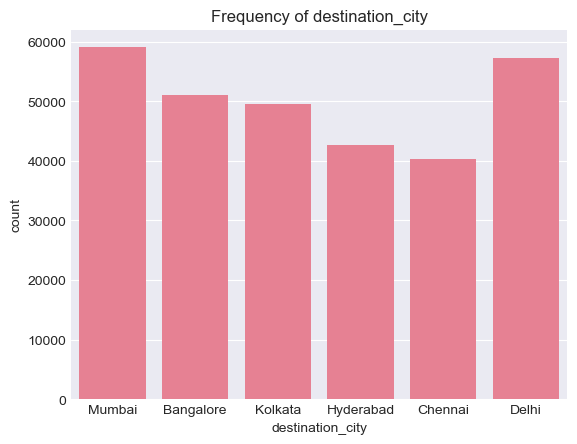

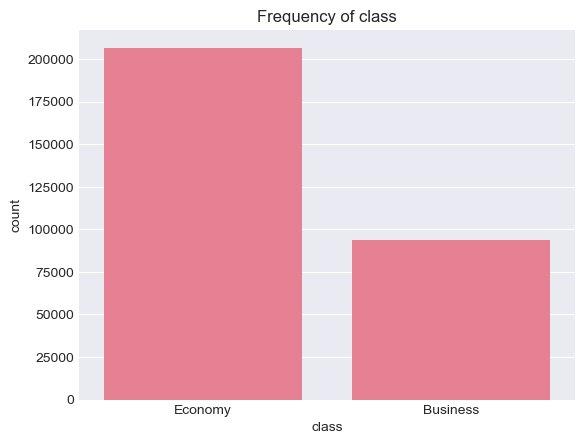

In [151]:
for column in cat_features:
    if column != 'flight':
        sns.countplot(x=df[column], data=df)
        plt.title("Frequency of " + column)
        plt.show()

In [152]:
df[df['flight']=='SG-8709']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
...,...,...,...,...,...,...,...,...,...,...,...
42049,SpiceJet,SG-8709,Delhi,Evening,one,Early_Morning,Chennai,Economy,13.08,43,4942
42053,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.42,43,4942
42228,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.83,44,4942
42381,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,27.00,45,4942


In [153]:
df[df['flight']=='SG-8709'].head(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
919,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,7,5953
1105,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,8,5953
1331,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,9,6060
1493,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,10,6270
1644,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,11,5953


In [154]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

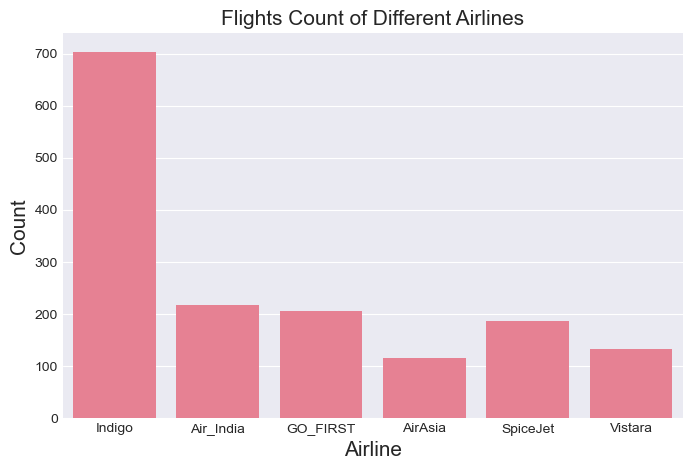

In [155]:
plt.figure(figsize=(8,5))
sns.countplot(x=df1['airline'])
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Индиго одна из самых популярных авиакомпаний.

In [156]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

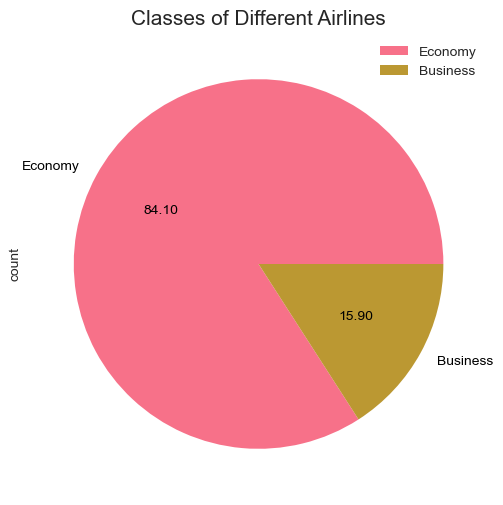

In [157]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

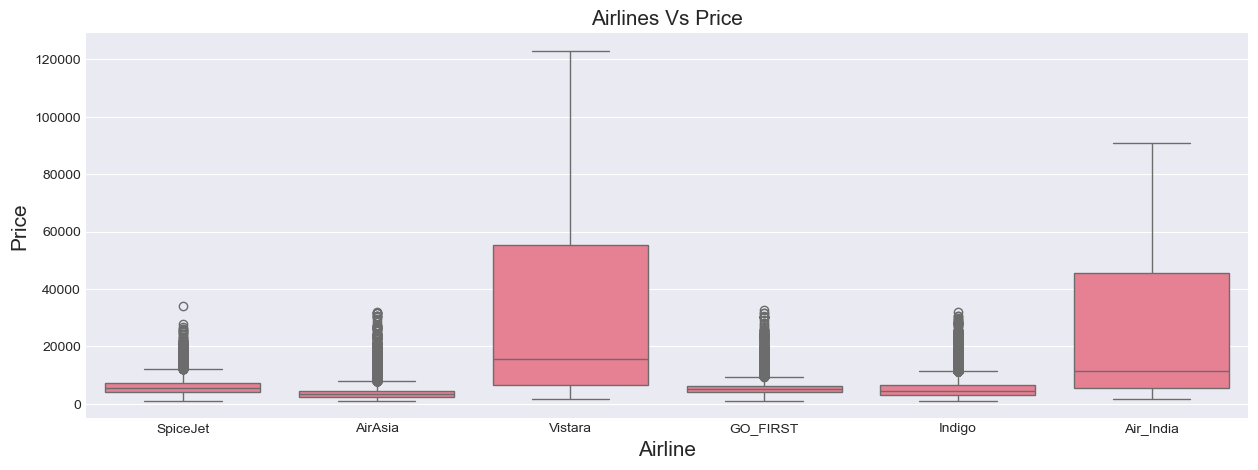

In [158]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Авиакомпании Vistara и Air India предлагают самые высокие цены по сравнению с другими. У SpiceJet, AirAsia, GO_First и Indigo цены примерно одинаковые.

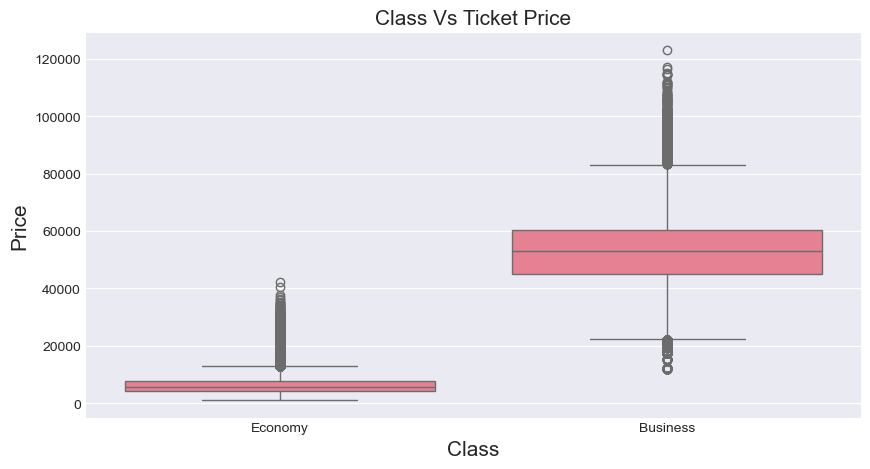

In [159]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df)
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билета в бизнес-классе выше, чем в эконом-классе.

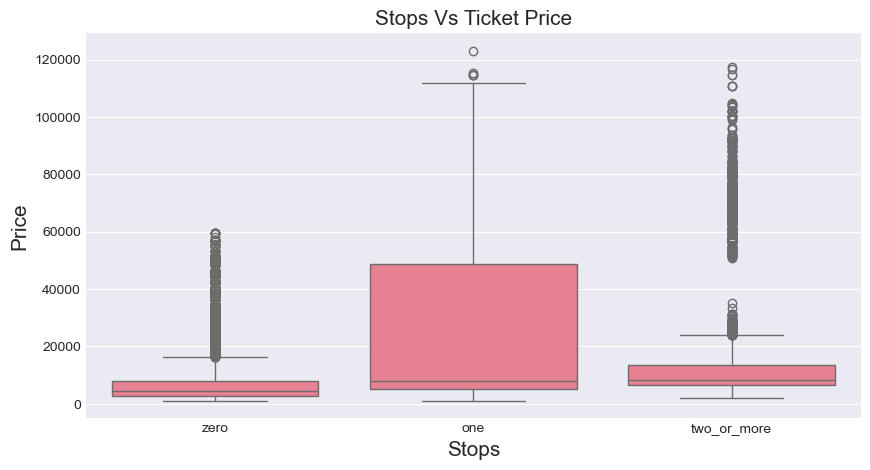

In [160]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df)
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

На рейсах с одной пересадкой действует максимальная цена билета.

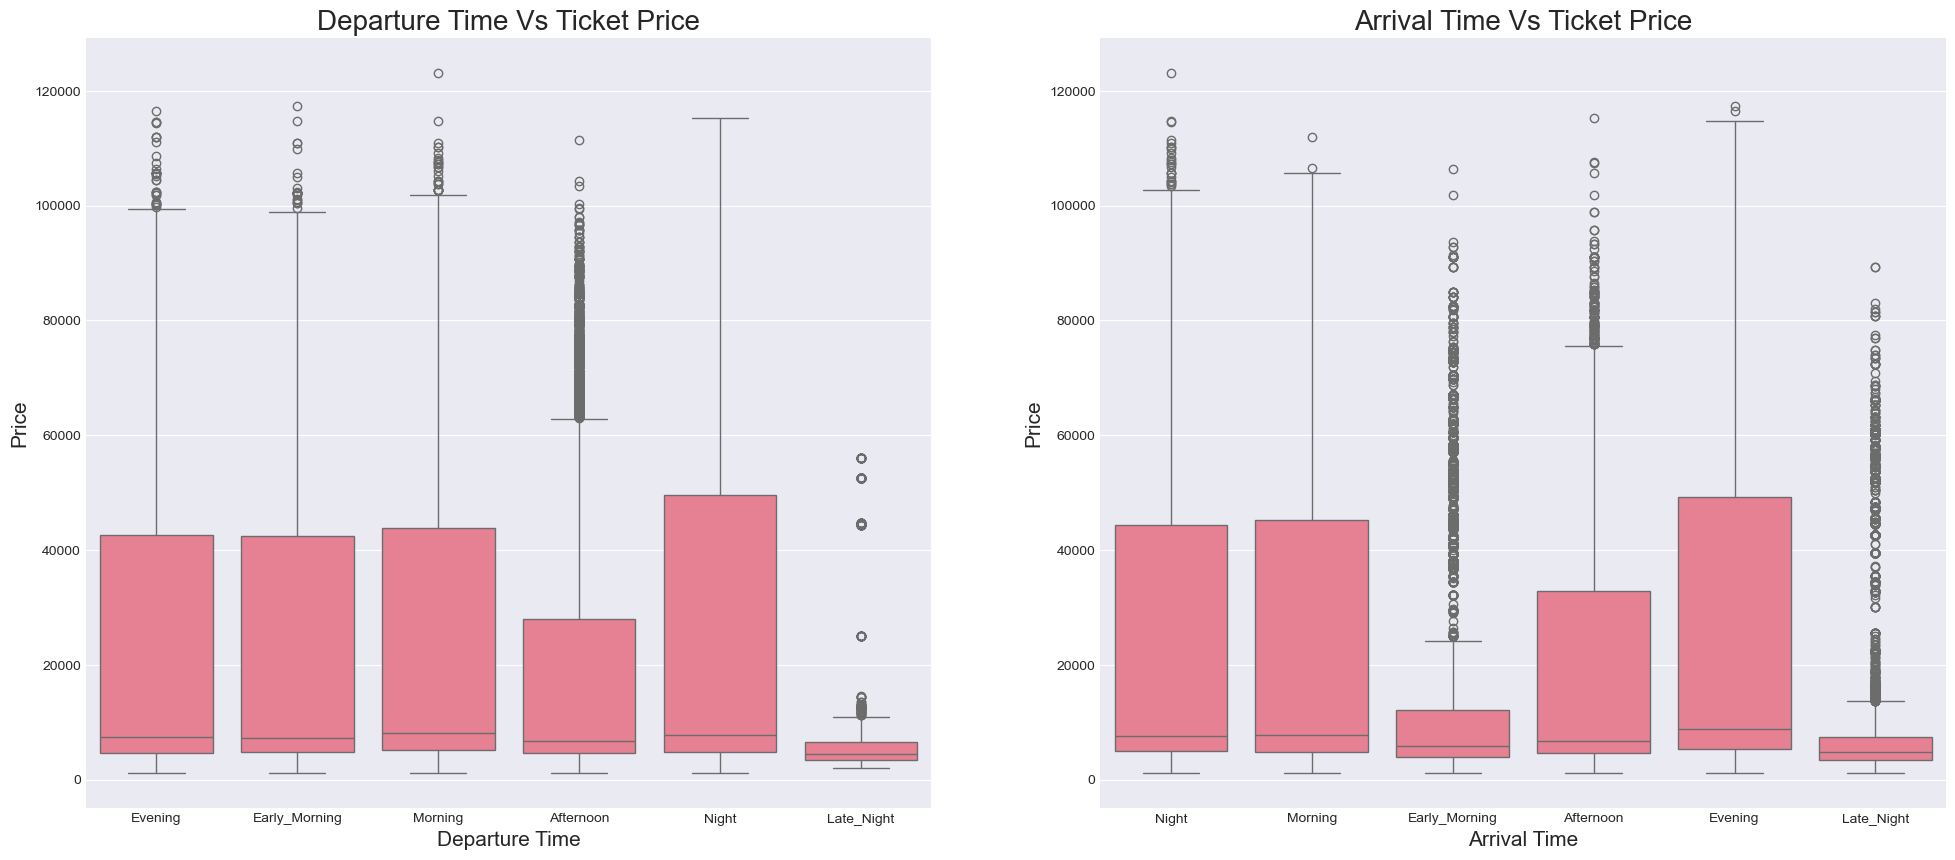

In [161]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df)
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Стоимость билетов на рейсы, вылетающие ночью, выше.
Стоимость билетов практически одинакова для рейсов с вылетом рано утром, утром и вечером.
Низкие цены на билеты на рейсы с поздним ночным вылетом.

Стоимость билетов на рейсы с прибытием вечером выше.
Стоимость билетов практически одинакова для рейсов, прибывающих утром и вечером.
Стоимость билетов низкая на рейсы с поздним ночным временем прибытия, совпадающим со временем отправления.

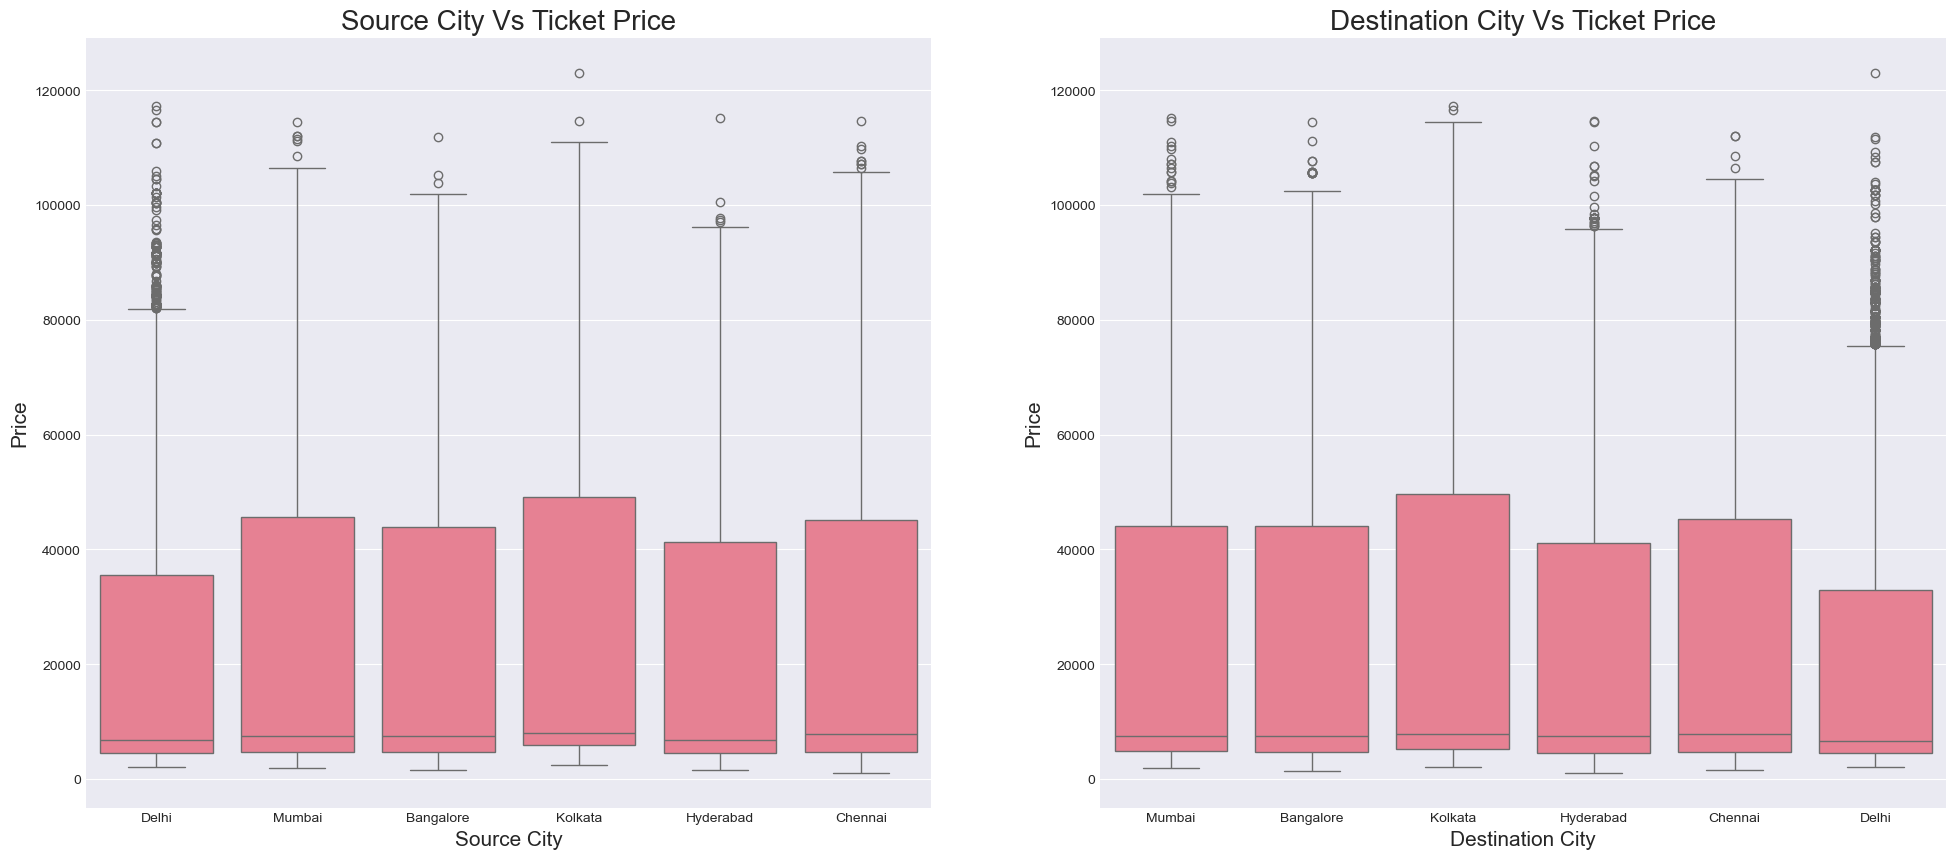

In [162]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df)
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билетов выше на рейсы, вылетающие из Калькутты.
Стоимость билетов практически одинакова для рейсов из таких городов, как Мумбаи и Ченнаи, Хайдарабад и Бангалор.
Цены на билеты на рейсы из Дели низкие.

Стоимость билетов выше на рейсы, пункты назначения которых — Калькутта и Ченнай.
Стоимость билетов на рейсы в такие города, как Мумбай и Бангалор, практически одинакова.
Цены на билеты на рейсы с городом назначения, таким как Дели, низкие.

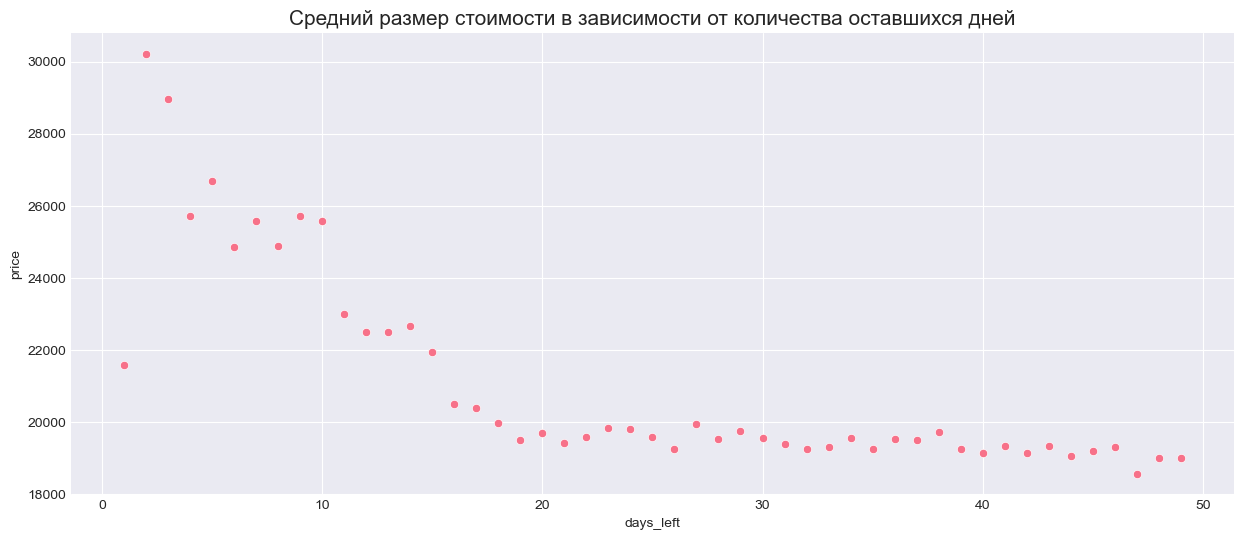

In [163]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Средний размер стоимости в зависимости от количества оставшихся дней",fontsize=15)

## Кодирование данных

In [165]:
df_encoded = df.copy()

In [166]:
# Удаляем колонку flight, так как в ней слишком много уникальных значений
df_encoded = df_encoded.drop('flight', axis=1)

In [167]:
label_encoders = {}
categorical_cols = ['airline', 'source_city', 'departure_time', 
                    'stops', 'arrival_time', 'destination_city', 'class']

In [168]:
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"Закодирован признак: {col}")

Закодирован признак: airline
Закодирован признак: source_city
Закодирован признак: departure_time
Закодирован признак: stops
Закодирован признак: arrival_time
Закодирован признак: destination_city
Закодирован признак: class


In [179]:
df_encoded.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


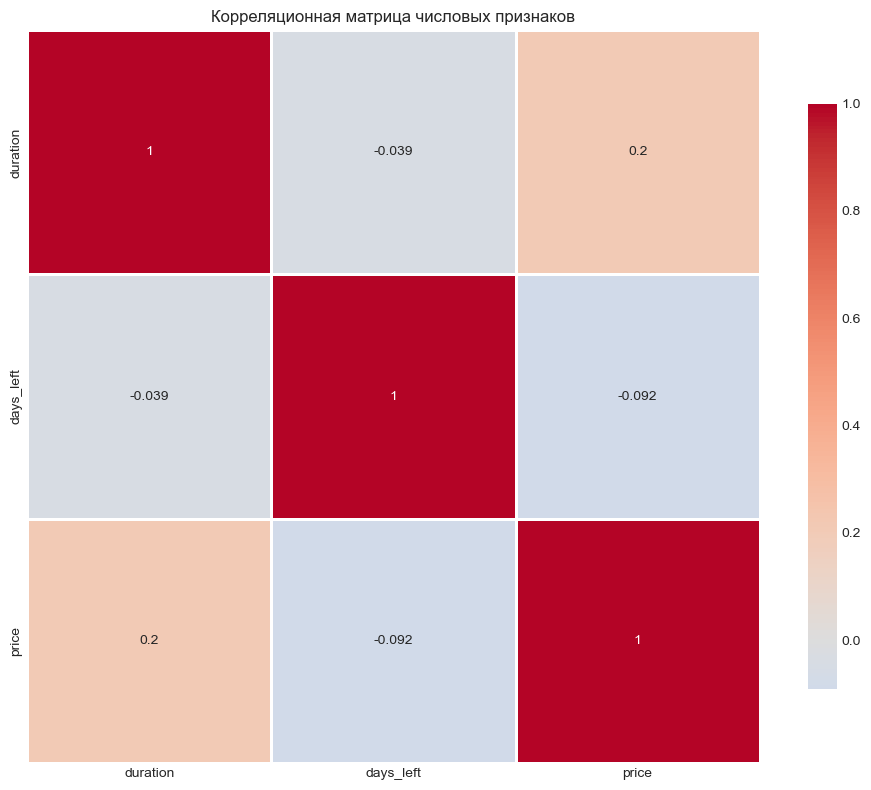

In [180]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=100, bbox_inches='tight')

In [182]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [170]:
print(f"\nРазмер признаков (X): {X.shape}")
print(f"Размер целевой переменной (y): {y.shape}")


Размер признаков (X): (300153, 9)
Размер целевой переменной (y): (300153,)


In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [172]:
print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (240122, 9)
Размер тестовой выборки: (60031, 9)


In [173]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [174]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [175]:
results = {}

In [176]:
for name, model in models.items():
    print(f"Обучение модели: {name}")
    
    # Обучение модели
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.4f}")

Обучение модели: Linear Regression
MAE: 4624.99
MSE: 49200540.29
RMSE: 7014.31
R2: 0.9046
Обучение модели: Ridge Regression
MAE: 4625.00
MSE: 49200538.32
RMSE: 7014.31
R2: 0.9046
Обучение модели: Lasso Regression
MAE: 4624.96
MSE: 49200533.84
RMSE: 7014.31
R2: 0.9046
Обучение модели: Decision Tree
MAE: 2518.45
MSE: 20255930.09
RMSE: 4500.66
R2: 0.9607
Обучение модели: Random Forest
MAE: 1091.45
MSE: 7763950.82
RMSE: 2786.39
R2: 0.9849
Обучение модели: Gradient Boosting
MAE: 2959.68
MSE: 24950509.12
RMSE: 4995.05
R2: 0.9516


In [177]:
# Сравнение результатов моделей
print("="*50)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ МОДЕЛЕЙ")
print("="*50)

results_df = pd.DataFrame(results).T
print("Результаты всех моделей:")
print(results_df)

СРАВНЕНИЕ РЕЗУЛЬТАТОВ МОДЕЛЕЙ
Результаты всех моделей:
                           MAE           MSE         RMSE        R2
Linear Regression  4624.994868  4.920054e+07  7014.309680  0.904554
Ridge Regression   4625.001448  4.920054e+07  7014.309540  0.904554
Lasso Regression   4624.958202  4.920053e+07  7014.309220  0.904554
Decision Tree      2518.453540  2.025593e+07  4500.658851  0.960705
Random Forest      1091.453380  7.763951e+06  2786.386696  0.984938
Gradient Boosting  2959.675014  2.495051e+07  4995.048460  0.951598


In [178]:
best_model_name = results_df['R2'].idxmax()
best_model_score = results_df.loc[best_model_name, 'R2']
print(f"Лучшая модель: {best_model_name} (R2: {best_model_score:.4f})")

Лучшая модель: Random Forest (R2: 0.9849)
